# Homework 4

In [1]:
print('by Maia Rosengarten')
print('February 27th, 2017')
print('Collaborators: Lara McConnaughey and Anwar Baroudi')

by Maia Rosengarten
February 27th, 2017
Collaborators: Lara McConnaughey and Anwar Baroudi


In [9]:
import matplotlib
import numpy as np
from numpy import linalg as LA
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy.stats import logistic as sig

np.set_printoptions(threshold=np.nan)
from scipy import io
import sklearn
from sklearn.preprocessing import normalize
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
def computeCost(X, y, w, regConst):
    prob = sp.special.expit(np.dot(X, w))
    ret = (regConst * np.linalg.norm(w)**2) - (vec(y).T.dot(np.log(prob + 0.000001)) + (1-vec(y)).T.dot(np.log(1 - prob + 0.000001)))
    return arr(ret)

In [155]:
def computeSGDGradient(X,  y, w, regConst, i, prob):
    n = X.shape[0]
    y = vec(y)
    w = vec(w)
    ret = (2 * regConst * w) - (vec((y[i] - prob)) * vec(X[i]))
    print('grad in sgd ' + str(ret))
    return ret

In [218]:
def computeBatchGradient(X, y, w, regConst, prob):
    n = X.shape[0]
    y = vec(y)
    w = vec(w)
    prob = vec(prob)
    ret= (2 * regConst * w) - (X.T.dot(y-prob))
    print('ret in batch ' + str(ret))
    return ret

In [13]:
def arr(vec): # 1 by d --> (d, )
    return np.matrix.flatten(vec)

In [14]:
def vec(arr): # d b 1 --> (d, 1)
    return arr.reshape((arr.shape[0], 1))

In [351]:
def computeStochGradientDescent(X, y, alpha, regConst, numIterations, dec):
    '''Computes stochastic gradient descent
    Args: 
        X (ndarray) - training data
        y (ndarray) - training labels
        alpha (int) - learning rate
        precision (int) - used for termination condition
        numFeat (int) - number of features
    Returns updated weight vector and lst of costs per iteration
    ''' 
    w = np.zeros((X.shape[0], 1))
    costs = [0 for i in range(numIterations)]
    
    for i in range(numIterations):
        ran = np.random.randint(0, X.shape[0])
        costs[i] = computeCost(X, y, w, regConst)[0] 
        prob = sp.special.expit(X[ran].T.dot(w))
#         gradient = computeSGDGradient(X, y, w, regConst, ran, prob)
#         w = vec(w)
        w = w - alpha * ((2 * regConst * w) - (vec(y)[i] - np.reshape(sp.special.expit(X[ran].T.dot(w)), (1, 1))) * vec(X[i]))
#         w = w - alpha * gradient
        print(w)
        w = arr(w)
        if dec==True and i!=0:
            alpha = alpha * 1/i
    return w, costs

In [353]:
def computeBatchGradientDescent(X, y, alpha, regConst, numIterations, dec):
    '''
        Computes batch gradient descent
        Args: 
            X (ndarray) - training data
            y (ndarray) - training labels
            alpha (int) - learning rate
            regConst (int) - lambda parameter to weight l2 regularization term
            precision (int) - used for termination condition
            numFeat (int) - number of features
        Returns updated weight vector and number of iterations
    ''' 
#     starting_point = X[1].dot(y[1])
    w = np.zeros((X.shape[1], 1))
    costs = [0 for i in range(numIterations)]
    for i in range(numIterations):
        costs[i] = computeCost(X, y, w, regConst)[0]
        w = w - alpha * ((2 * regConst * w) - (np.dot(X.T, vec(y)-np.reshape(sp.special.expit(np.dot(X, w)), (X.shape[0], 1)))))
    return w, costs

In [206]:
def plotCostFN(costs):
    '''
        Plots cost function as a function of number of iterations
        Args:
            costs (ndarray) - lst of costs per iteration of gradient descent
    '''
   
    iters = [i for i in range(len(costs))]
    plt.plot(iters, costs)
    plt.xscale("log")
    plt.title("Cost Per Iteration of Gradient Descent")
    plt.xlabel('numIterations')
    plt.ylabel('cost')
    plt.show()

In [349]:
def classifyPoints(weightVect, data):
    '''
        Given data, computes sigmoid to approximate likelihood of being in class 1. If greater than 0.5->class1, else class0
    
    '''
    predictions = [0 for i in range(data.shape[0])]
    for x in range(data.shape[0]):
        prob = sp.special.expit(vec(data[x]).T.dot(weightVect))
#         print(prob.shape)
#         print(prob[0][0])
#         print('prob classify' + str(prob))
        if prob > 0.5:
            predictions[x] = 1
    return predictions

In [63]:
def computeAcc(predictions, validY):
    '''
        Given predicted labels and valid labels, compute error rate
    '''
    return acc(validY, predictions)   

In [20]:
def generateCsv(aryPredictions, strCsvName):
    '''
    Writes predictions of testSet to csv file
    Args:
        aryPredictions (ndarray) - (nx1)-array of predictions given size n test (or valid) set
        strCsvName (str) - name of csv file to write to
    '''
    with open(strCsvName + '.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(len(aryPredictions)):
            writer.writerow([i, aryPredictions[i]])
    csvfile.close()

# Problem 1.4

In [21]:
X = np.array([[0, 3, 1], [1, 3, 1], [0, 1, 1], [1, 1, 1]]).reshape(4, 3)
y = np.array([1, 1, 0, 0])
w = np.array([-2, 1, 0])
lam = 0.07

In [22]:
import scipy.optimize as opt

In [55]:
def computeGradient(lam, w, X, y, s):
    return 2 * lam * w - X.T.dot(y - s)

# (a)

In [10]:
s = sp.special.expit(X.dot(w))

(4,)

# (b)

In [ ]:
gradient = computeGradient(lam, w, X, y, s)
hessian = computeHessian(lam, w, X, y, s)
w = w - gradient/hessian

# (c)

In [ ]:
s = sp.special.expit(X.dot(w))

# (d)

In [ ]:
gradient = computeGradient(lam, w, X, y, s)
hessian = computeHessian(lam, w, X, y, s)
w = w - gradient/hessian


# Problem 4

In [107]:
data = sp.io.loadmat('data.mat')

In [293]:
testSet = data['X_test']
trainX = data['X']
trainY = data['y']

sklearn.preprocessing.normalize(testSet.astype(float))
sklearn.preprocessing.normalize(trainX.astype(float))

combined = np.hstack([trainX, trainY])
np.random.shuffle(combined)
trainX = combined[:, :-1]
trainY = combined[:, -1]
trainX = np.hstack([trainX, np.array([1] * 6000).reshape(6000,1)])
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=.1, random_state=42)
print("")


In [308]:
# alpha = 0.001
# regConst = 0.01
# numIterations = 100000
# no norm 94.4%


# alpha = 0.000001
# regConst = 0.001
# numIterations = 1000000
# no normalized 92.4%

# alpha = 0.000001
# regConst = 0.0001
# numIterations = 1000
# #.90 with new ness
# # .924 normalized before.

# alpha = .01
# regConst = 0.01
# numIterations = 10000
# #.89

# alpha = 10
# regConst = 0.07
# numIteratoins = 100
# #.89

alpha = .001
regConst = .007
numIterations = 10000
#.939


# 4.1 Batch Gradient Descent

In [344]:
wBatch, costsBatch = computeBatchGradientDescent(trainX, trainY, alpha, regConst, numIterations, False)

In [345]:
predictionsBatch = classifyPoints(wBatch, validX)
accuracyBatch = accuracy_score(validY, predictionsBatch)
print(accuracyBatch)
print(predictionsBatch)

classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1
classify 1

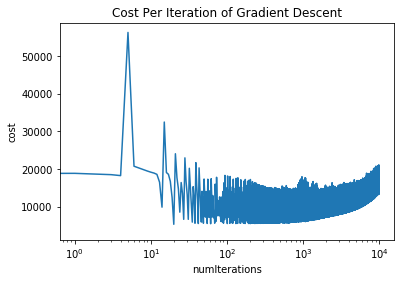

0.935


In [346]:
plotCostFN(costsBatch)
print(accuracyBatch)

# 4.2 Stochastic Gradient Descent

In [70]:
# alpha = 10
# regConst =  0
# numIterations = 10000
# 91% no norm

# alpha = 0.0000001
# regConst = 0.000001
# numIterations = 1000000

# alpha = 0.0001
# regConst = 0.001
# numIterations = 100000
# #.89 normal

# alpha = 0.01
# regConst = 0.1
# numIterations = 100000
# #.929 normal

# alpha = 0.01
# regConst = 1
# numIterations = 100000
#.9258 normal

# alpha = 10
# regConst = 1
# numIterations = 100000
#.9308

# alpha = 25
# regConst = 1
# numIterations = 100000
#.924


# alpha = 25
# regConst = 1
# numIterations = 100000
#.929

# alpha = .001
# regConst = 1
# numIterations = 100000
#.928

# alpha = .0001
# regConst = .001
# numIterations = 100000
#.91

# alpha = .00001
# regConst = .001
# numIterations = 100000
#.9125

# alpha = .000001
# regConst = .001
# numIterations = 100000
#.9


alpha = 10
regConst = 1
numIterations = 100000
#.924

In [347]:
testSet = data['X_test']
np.random.shuffle(testSet)

trainX = data['X']
trainY = data['y']
sklearn.preprocessing.normalize(trainX.astype(float))
sklearn.preprocessing.normalize(testSet.astype(float))

combined = np.hstack([trainX, trainY])
np.random.shuffle(combined)
trainX = combined[:, :-1]
trainY = combined[:, -1]
trainX = np.hstack([trainX, np.array([1] * 6000).reshape(6000,1)])
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=.2, random_state=42)

print('')

In [348]:
wSGD, costsSGD = computeStochGradientDescent(trainX, trainY, alpha, regConst, numIterations, False)

TypeError: computeCost() takes 4 positional arguments but 5 were given

In [73]:
predictionsSGD = classifyPoints(wSGD, validX)
accuracySGD = accuracy_score(validY, predictionsSGD)
print(accuracySGD)
# print(predictionsSGD)


0.751666666667


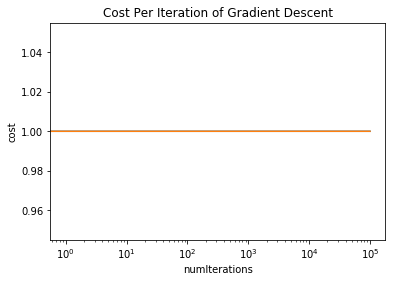

In [74]:
plotCostFN(costsSGD)

# 4.3 SGD Decreasing Epsilon

In [302]:
# alpha = 0.01
# regConst = 0
# numIterations = 1000000

In [625]:
# alpha = 0.0000001
# regConst = 0.000001
# numIterations = 1000000

alpha = 10
regConst = 1
numIterations = 100000
#.9308

In [630]:
wSGDDec, costsSGDDec = computeStochGradientDescent(trainX, trainY, alpha, regConst, numIterations, True)

/Users/maialena/anaconda/envs/189hw/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log


In [631]:
predictionsSGDDec = classifyPoints(wSGDDec, validX)
accuracySGDDec = accuracy_score(validY, predictionsSGDDec)

print(accuracySGDDec)

0.924166666667


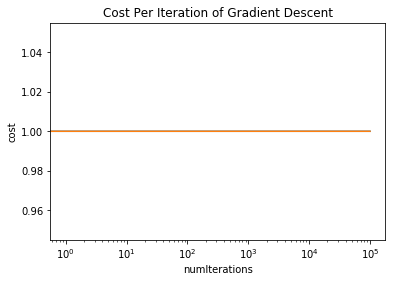

In [644]:
plotCostFN(costsSGDDec)

# 4.4 Kaggle Submission

In [641]:
testSet = data['X_test']
trainX = data['X']
trainY = data['y']
combined = np.hstack([trainX, trainY])
np.random.shuffle(combined)
trainX = combined[:, :-1]
trainY = combined[:, -1]
trainX = np.hstack([trainX, np.array([1] * trainX.shape[0]).reshape(trainX.shape[0],1)])
testSet = np.hstack([testSet, np.array([1] * testSet.shape[0]).reshape(testSet.shape[0],1)])

sklearn.preprocessing.normalize(trainX.astype(float))
sklearn.preprocessing.normalize(testSet.astype(float))


# not normalizing: alpha = 10 * -7
# regConst = 0.01
# numIterations = 10000

# alpha = 0.001
# regConst = 0.01
# numIterations = 100000

alpha = 0.00001
regConst = 0.001
numIterations = 100000

wKaggle, costsKaggle = computeBatchGradientDescent(trainX, trainY, alpha, regConst, numIterations, True)

predictionsKaggle = classifyPoints(wKaggle, testSet)

generateCsv(predictionsKaggle, 'thurs')


/Users/maialena/anaconda/envs/189hw/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log


In [667]:
print(len(predictionsBatch))
# zeros = 0
# ones = 0
# for i in predictionsBatch:
#     if i==0:
#         zeros +=1
#     ones +=1
# print('num 0' +str(zeros))
# print(ones)
        

1200


Kaggle Display Name: maialena

Kaggle Score:

In [637]:
print(len(predictionsBatch))

497
